Dataset Loaded Successfully!

Shape of Dataset: (200, 5)

 Dataset Info: <bound method DataFrame.info of      customer id   genre  age  annual income  spending score
0              1    Male   19             15              39
1              2    Male   21             15              81
2              3  Female   20             16               6
3              4  Female   23             16              77
4              5  Female   31             17              40
..           ...     ...  ...            ...             ...
195          196  Female   35            120              79
196          197  Female   45            126              28
197          198    Male   32            126              74
198          199    Male   32            137              18
199          200    Male   30            137              83

[200 rows x 5 columns]>
First 5 Rows:
    customer id   genre  age  annual income  spending score
0            1    Male   19             15              39
1    

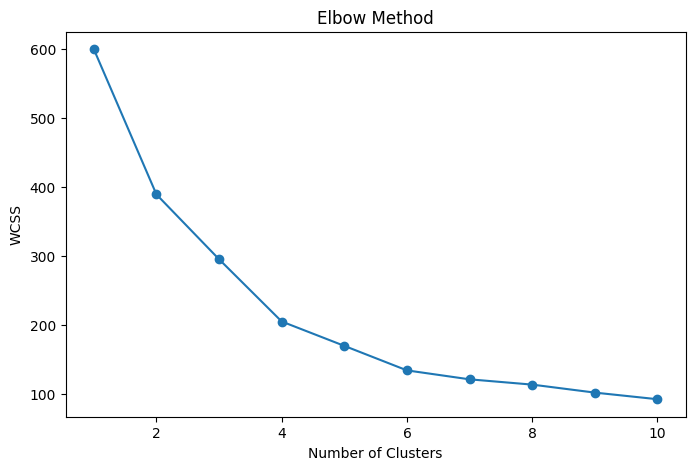

Enter the optimal number of clusters (from Elbow Method):  3


Silhouette Score: 0.3579234303882264
Clustered data saved to 'clustered_customer_data.csv'.


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


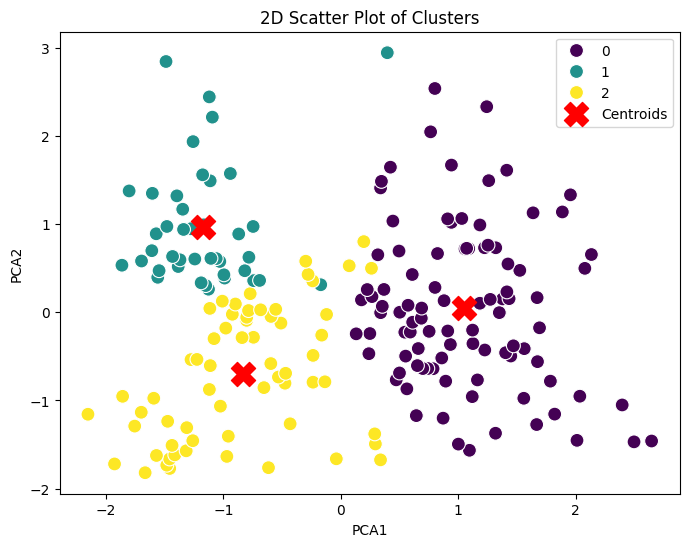

<Figure size 1000x800 with 0 Axes>

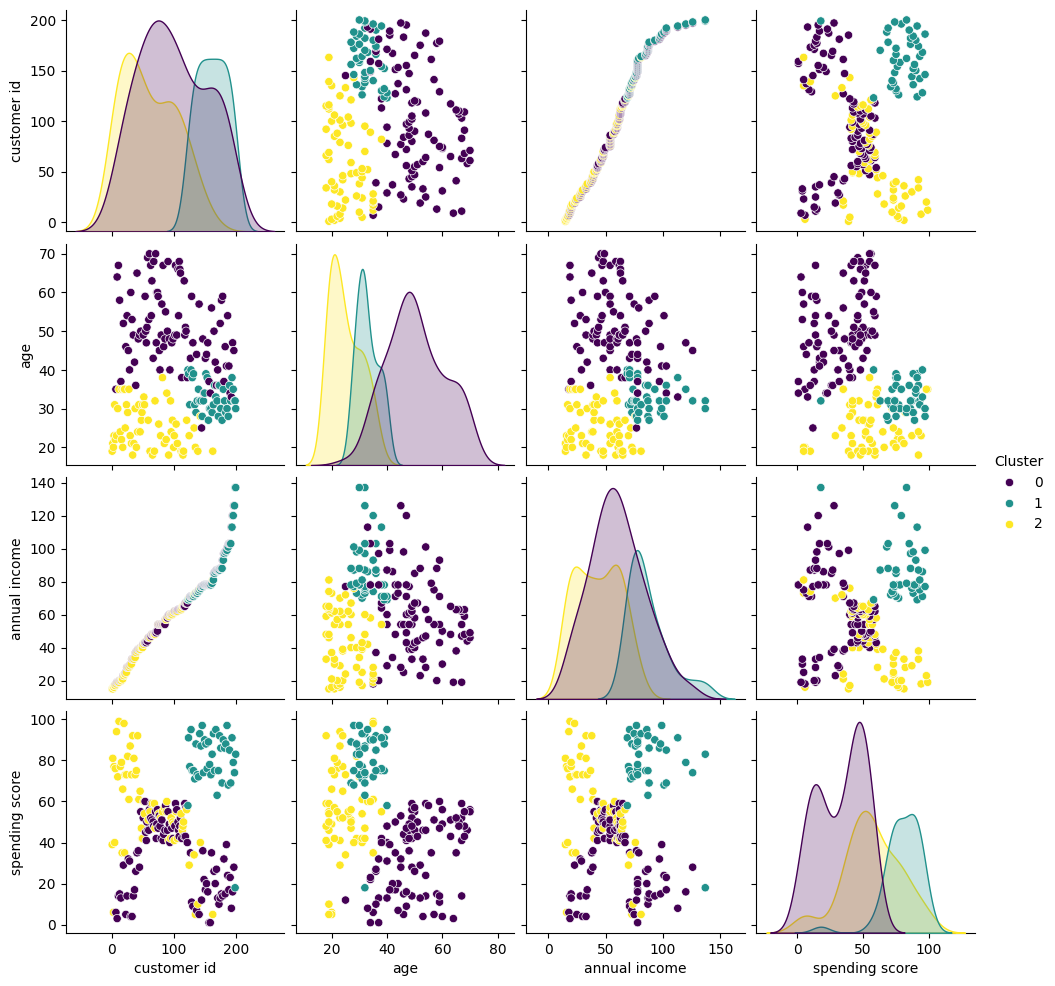


Recommendations:
Cluster 2: Younger audience - Focus on social media marketing.
Cluster 0: General customers - Provide personalized discounts.
Cluster 1: High spenders - Consider loyalty programs.
Clustering Analysis Complete!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Step 1: Load the Dataset
def load_data(file_path):
    df = pd.read_csv(file_path)
    print("Dataset Loaded Successfully!\n")
    print("Shape of Dataset:", df.shape)
    print("\n Dataset Info:", df.info)
    print("First 5 Rows:\n", df.head())
    print("\nData Types:\n", df.dtypes)
    print("\nMissing Values:\n", df.isnull().sum())
    print("\nDuplicate Rows:", df.duplicated().sum())
    return df

# Step 2: Data Preprocessing
def preprocess_data(df):
    scaler = StandardScaler()
    features = ['age', 'annual income', 'spending score']
    df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)
    return df_scaled

# Step 3: Determine Optimal Clusters and Apply K-Means
def find_optimal_clusters(data):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, 11), wcss, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()

def apply_kmeans(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)
    data['Cluster'] = labels
    print("Silhouette Score:", silhouette_score(data.iloc[:, :-1], labels))
    return data, kmeans

# Step 4: Visualization
def visualize_clusters(data, kmeans):
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data.iloc[:, :-1])
    reduced_df = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])
    reduced_df['Cluster'] = data['Cluster']

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=reduced_df, palette='viridis', s=100)
    centers = pca.transform(kmeans.cluster_centers_)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, marker='X', label='Centroids')
    plt.title('2D Scatter Plot of Clusters')
    plt.legend()
    plt.show()

# Pair Plot
def pair_plot(data):
    plt.figure(figsize=(10, 8))
    sns.pairplot(data, hue='Cluster', palette='viridis')
    plt.show()

def generate_recommendations(data):
    recommendations = []
    for cluster in data['Cluster'].unique():
        cluster_data = data[data['Cluster'] == cluster]
        avg_age = cluster_data['age'].mean()
        avg_income = cluster_data['annual income'].mean()
        avg_spending = cluster_data['spending score'].mean()

        if avg_spending > 75:
            recommendations.append(f"Cluster {cluster}: High spenders - Consider loyalty programs.")
        elif avg_income > 50000:
            recommendations.append(f"Cluster {cluster}: High-income group - Promote premium products.")
        elif avg_age < 30:
            recommendations.append(f"Cluster {cluster}: Younger audience - Focus on social media marketing.")
        else:
            recommendations.append(f"Cluster {cluster}: General customers - Provide personalized discounts.")

    print("\nRecommendations:")
    for rec in recommendations:
        print(rec)

# Main Execution Flow
if __name__ == "__main__":
    # Replace 'customer_data.csv' with your dataset file path
    file_path = "customer_data.csv"
    
    # Step 1: Load Data
    data = load_data(file_path)

    # Step 2: Preprocess Data
    scaled_data = preprocess_data(data)

    # Step 3: Determine Optimal Clusters
    find_optimal_clusters(scaled_data)
    
    # User Input for Number of Clusters
    n_clusters = int(input("Enter the optimal number of clusters (from Elbow Method): "))

    # Apply K-Means Clustering
    clustered_data, kmeans_model = apply_kmeans(scaled_data, n_clusters)

    # Add Cluster Labels to Original Data
    data['Cluster'] = clustered_data['Cluster']

    # Save Clustered Data
    data.to_csv("clustered_customer_data.csv", index=False)
    print("Clustered data saved to 'clustered_customer_data.csv'.")

    # Step 4: Visualization
    visualize_clusters(clustered_data, kmeans_model)
    pair_plot(data)

    
    # Step 5: Generate Recommendations
    generate_recommendations(data)
    
    print("Clustering Analysis Complete!")
